In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.special import comb
from scipy.stats import binom

import matplotlib.pyplot as plt

# Entropy of characters in a string. - IN CLASS
Calculate the entropy of the following string ('aabcddddefffgaaacccii')

In [34]:
def shan_entropy(string_data):

    p = []
    occurences = {}
    string_length = len(string_data)

    for char in string_data: # check if already accounted for in occurences
        if char not in occurences:
            occurences.setdefault(char, 1)
        else:
            occurences[char] += 1 # add character if not already in occurences
        
        # calculate probabilities
        for char, num in occurences.items():
            p.append(num/string_length)
            
        # calculate entropy
        entr = lambda p: -np.sum(p * np.log(p))   

    return(entr(p))


In [28]:
string_data = 'aabcddddefffgaaacccii'
entr = shan_entropy(string_data)
print('The entropy of the string is: ', entr)

The entropy of the string is:  23.341036319261


# Entropy and cross entropy of "High Flight" - IN CLASS

High Flight is a famous poem. Read in the contents of 'HighFlight.txt' as a list of characters. Calculate the following.

1) What is the entropy of the characters in this poem (including the special characters for simplicity)? 

2) Suppose these characters appeared uniformly, you would expect the entropy to be higher. What would the entropy for the set of characters contained in this poem be if they were uniformly distributed.

3) Let p be the frequency distribution of characters in the poem and q be the uniform frequency distribution of those characters. Calculate H(p,q) and H(q,p) (the respective cross entropies) along with KL(p||q) and KL(q||p) (the KL divergences). Verify that H(p,q) = H(p) + KL(p||q)

In [51]:
f = open('HighFlight.txt','r')
contents = f.read()
#print(type(contents))

stList = list(contents)
alphabet = list(set(stList)) # list of symbols in the string
# print('Alphabet of symbols in the string:')
#print(alphabet)

# 1) Calculate entropy
pd_series = pd.Series(stList)
counts_poem = pd_series.value_counts()
#print(counts)
entr_poem = entropy(counts_poem, base=2)
print('1) entropy of characters in poem : ', entr_poem)


# 2) Calculate entropy if characters are uniformly distributed
pd_series = pd.Series(alphabet)
counts_uniform = pd_series.value_counts()
#print(counts)
entr_uniform = entropy(counts_uniform, base=2)
print('2) entropy if the characters in the poem were uniformly distributed: ', entr_uniform)

# 3) 
# calculate cross entropies
alphabet_length = len(alphabet)
poem_length = len(stList)

p = counts_poem/poem_length
q = counts_uniform/alphabet_length

def cross_entropy(p, q):
    return -sum([p[i]*np.math.log2(q[i]) for i in range(len(p))])

pq_entr = cross_entropy(p,q)
qp_entr = cross_entropy(q,p)
print('3) Cross entropies and KL divergences:')
print('H(p,q): ', pq_entr)
print('H(q,p): ', qp_entr)

# calculate KL divergences
KL_pq = entropy(counts_poem,counts_uniform, base=2)
KL_qp = entropy(counts_uniform,counts_poem, base=2)
print('KL(p||q): ', kl_div_pq)
print('KL(q||p): ', kl_div_qp)

# Verify that H(p,q) = H(p) + KL(p||q)
print('')
print('Verify that H(p,q) = H(p) + KL(p||q)')
print('H(p,q) = ', pq_entr)
print('H(p) = ', entr_poem)
print('KL(p||q): ', kl_div_pq)
print('H(p) + KL(p||q) = ', entr_poem + kl_div_pq)
print('This shows that H(p,q) = H(p) + KL(p||q)')

['a', 'I', 'v', 'h', 'U', 'o', 'n', 'P', 'w', 'j', '\n', 'b', 'u', 'e', 'M', 'A', '-', 't', 'y', 'f', 'k', 'c', '!', 'g', 'S', 'l', 'H', ',', 's', ';', 'Y', 'd', 'r', 'O', 'W', '.', 'G', 'm', "'", 'E', 'i', 'T', 'p', ' ']
1) entropy of characters in poem :  4.52641960765623
2) entropy if the characters in the poem were uniformly distributed:  5.459431618637298
3) Cross entropies and KL divergences:
H(p,q):  5.4594316186372955
H(q,p):  6.726824701451335
KL(p||q):  0.9330120109810669
KL(q||p):  1.2673930828140325

Verify that H(p,q) = H(p) + KL(p||q)
H(p,q) =  5.4594316186372955
H(p) =  4.52641960765623
KL(p||q):  0.9330120109810669
H(p) + KL(p||q) =  5.459431618637296
This shows that H(p,q) = H(p) + KL(p||q)


# CART tree for Iris dataset in sklearn - IN CLASS

Here we'll look at some of the finer points of using the CART classifier. Using the initial snippet of code below, import the iris data set from sklearn as well as the module for a decision tree classifier. Use the classifier sklearn.tree.DecisionTreeClassifier to construct and fit a decision tree to this data. You'll need to read the sklearn documentation for how to do this. In every case below, visualize your decision tree with sklearn.tree.plot_tree (see documentation for use).

Task 1: There are two criterion that can be used here, criterion = 'entropy' which indicates the use of information gain for splitting determinations, and criterion = 'gini' which uses the gini coefficient instead. Use both to construct a tree. Is there any difference between the trees you constructed?

Task 2: Now split the data into two halves and fit a tree to each separately. Are they the same tree? Be careful not to just take the first and second halves of the data since they are ordered. Permute the data before splitting it into halves.

%%%%%

from sklearn.datasets import load_iris

from sklearn import tree


X, y = load_iris(return_X_y=True)

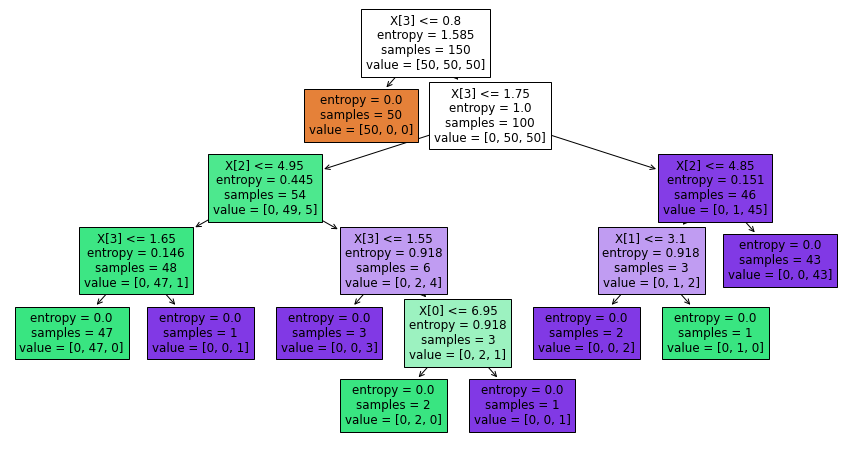

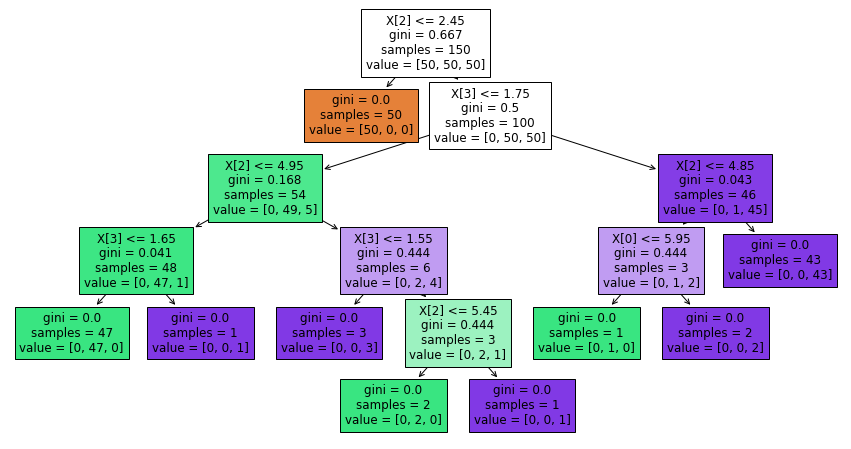

There is not much of a difference between the entropy criteria tree and the gini criteria tree, they are pretty close to being the same.


In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

# Task 1: Use both entropy and gini to construct a tree
X, y = load_iris(return_X_y=True)

# entropy
model_entr = tree.DecisionTreeClassifier(criterion = 'entropy')
model_entr__fit = model_entr.fit(X, y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_entr__fit,filled = True , ax=ax1) 
plt.show()

# gini
model_gini = tree.DecisionTreeClassifier(criterion = 'gini')
model_gini_fit = model_gini.fit(X, y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_gini_fit,filled = True , ax=ax1) 
plt.show()

print("There is not much of a difference between the entropy criteria tree and the gini criteria tree, they are pretty close to being the same.")

***********
Difference between trees:


[[5.6 3.  4.1 1.3]
 [6.4 2.8 5.6 2.2]
 [6.5 3.2 5.1 2. ]
 [5.  3.2 1.2 0.2]
 [6.  2.2 5.  1.5]
 [4.3 3.  1.1 0.1]
 [7.7 2.8 6.7 2. ]
 [6.7 3.3 5.7 2.1]
 [5.1 3.7 1.5 0.4]
 [6.8 3.  5.5 2.1]
 [5.6 2.8 4.9 2. ]
 [6.6 3.  4.4 1.4]
 [6.1 2.8 4.7 1.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [4.9 3.1 1.5 0.2]
 [6.7 3.1 4.4 1.4]
 [5.7 3.8 1.7 0.3]
 [7.2 3.  5.8 1.6]
 [6.6 2.9 4.6 1.3]
 [4.9 3.1 1.5 0.1]
 [5.1 2.5 3.  1.1]
 [5.9 3.  5.1 1.8]
 [6.1 2.6 5.6 1.4]
 [4.6 3.2 1.4 0.2]
 [6.  3.4 4.5 1.6]
 [5.6 3.  4.5 1.5]
 [5.7 2.9 4.2 1.3]
 [4.6 3.1 1.5 0.2]
 [6.1 2.9 4.7 1.4]
 [5.8 2.7 3.9 1.2]
 [4.4 3.2 1.3 0.2]
 [6.7 3.1 4.7 1.5]
 [4.7 3.2 1.6 0.2]
 [6.5 3.  5.2 2. ]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.5 0.3]
 [5.7 3.  4.2 1.2]
 [6.5 3.  5.5 1.8]
 [6.3 3.3 4.7 1.6]
 [4.8 3.1 1.6 0.2]
 [4.9 2.5 4.5 1.7]
 [5.7 2.8 4.5 1.3]
 [5.1 3.3 1.7 0.5]
 [6.7 2.5 5.8 1.8]
 [6.7 3.  5.2 2.3]
 [6.9 3.1 4.9 1.5]
 [4.8 3.4 1.9 0.2]
 [5.2 3.4 1.4 0.2]
 [6.8 2.8 4.8 1.4]
 [5.5 2.5 4.  1.3]
 [5.  3.  1.6 0.2]
 [5.4 3.9 1.

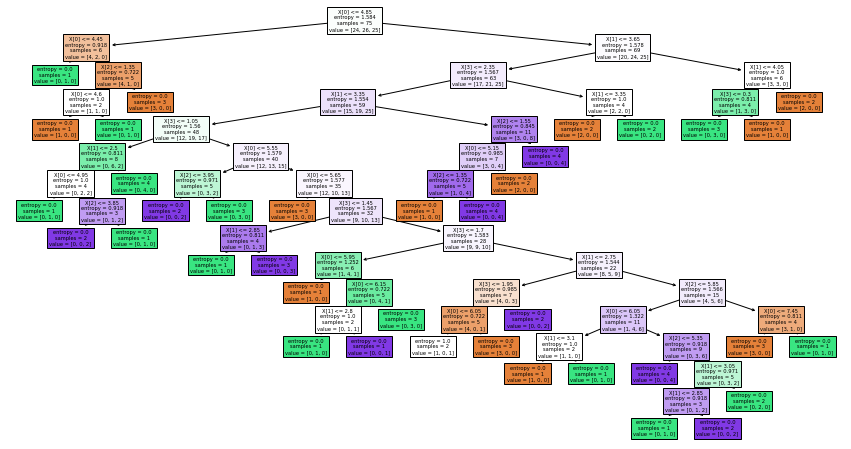

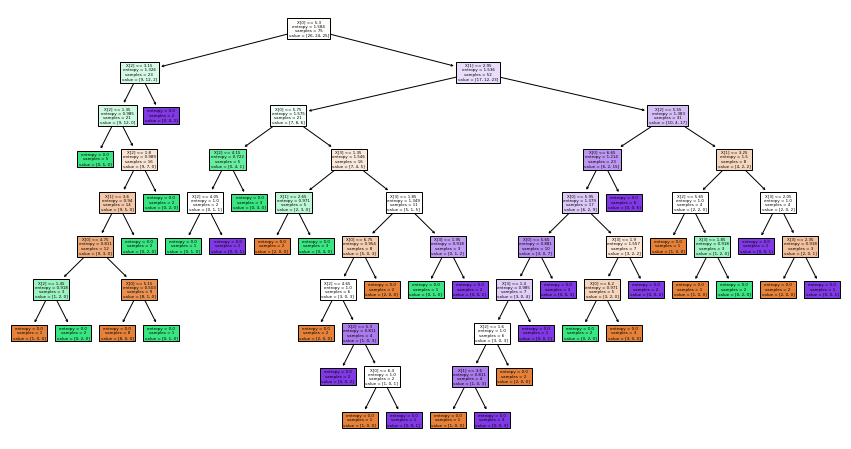

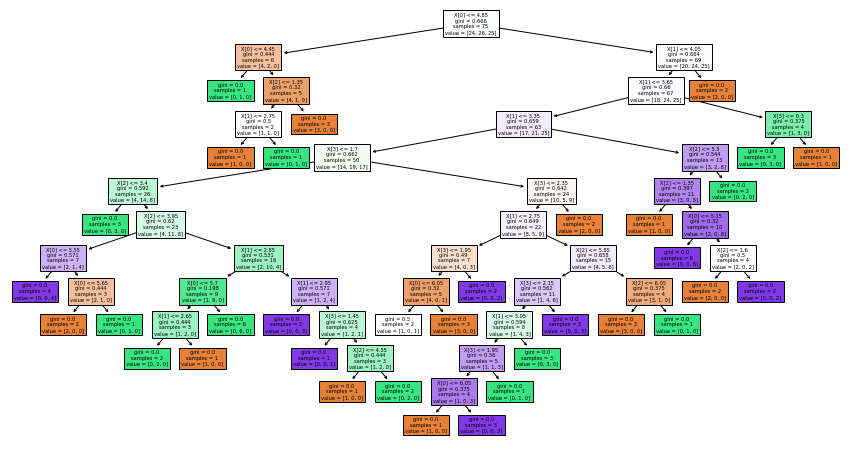

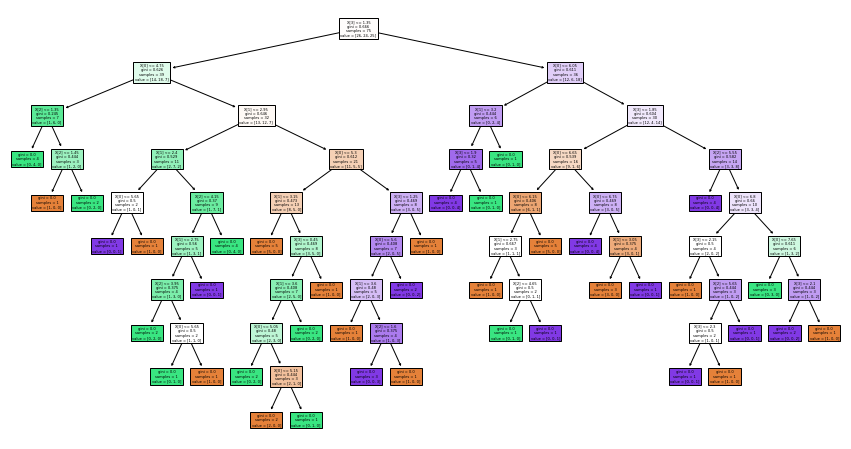

In [33]:
# Task 2: Now split the data into two halves and fit a tree to each separately.
# Are they the same tree? Be careful not to just take the first and second halves of the data since they are ordered. 
# Permute the data before splitting it into halves.

from sklearn.datasets import load_iris
from sklearn import tree

X, y = load_iris(return_X_y=True)


# permute the data and split into halves
X_permute = np.random.permutation(X)
y_permute = np.random.permutation(y)

# X data
length_X = len(X)
middle_index_X = length_X//2
first_half_X = X_permute[:middle_index_X]
#print(first_half_X)
second_half_X = X_permute[middle_index_X:]
print(second_half_X)

# y data
length_y = len(y)
middle_index_y = length_y//2
first_half_y = y_permute[:middle_index_y]
print(first_half_y)
second_half_y = y_permute[middle_index_y:]
print(second_half_y)


# fit trees
model_entr = tree.DecisionTreeClassifier(criterion = 'entropy')
model_entr__fit = model_entr.fit(first_half_X, first_half_y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_entr__fit,filled = True , ax=ax1) 
plt.show()

model_entr = tree.DecisionTreeClassifier(criterion = 'entropy')
model_entr__fit = model_entr.fit(second_half_X, second_half_y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_entr__fit,filled = True , ax=ax1) 
plt.show()

model_entr = tree.DecisionTreeClassifier(criterion = 'gini')
model_entr__fit = model_entr.fit(first_half_X, first_half_y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_entr__fit,filled = True , ax=ax1) 
plt.show()

model_entr = tree.DecisionTreeClassifier(criterion = 'gini')
model_entr__fit = model_entr.fit(second_half_X, second_half_y)
fig , ax1 = plt.subplots(figsize = [15,8])
tree.plot_tree(model_entr__fit,filled = True , ax=ax1) 
plt.show()




**********
The trees are different and are not the same.

# Conditional entropy, joint entropy, and the chain rule. - Homework

Assume that a combined system is comprised of two discrete random variables X and Y. The conditional entropy is defined as the amount of information needed to describe Y if you already know the value of the random variable X. In math terms, it is 

$$ H(Y|X) = - \displaystyle \sum_{x \in X, y \in Y} p(x,y) \log \frac{p(x,y)}{p(x)}  $$

where p(x,y) is the probability of (x and y). Prove that $H(Y|X) = H(X,Y) - H(X)$. This is referred to as the chain rule for entropy and it can be derived by appropriately manipulating the sum above. 

Further prove that $H(Y|X) = H(X|Y) - H(X) + H(Y)$, which is referred to as Bayes rule for conditional entropy. This can be prooved using the above relation without manipulating sums.

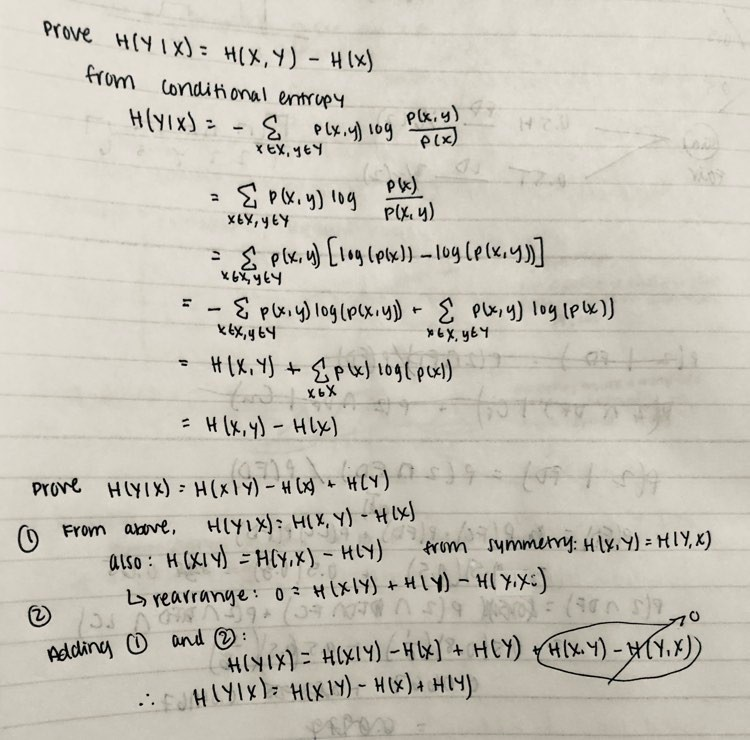


# Simple entropy calculation for weather - Homework.

In Phoenix, it is sunny 300 days per year, while in Nashville, it is sunny 208 days per year. Calculate the entropy of the weather in both cities. One will be higher than the other. Why and does it make sense?

In [14]:
p_Phoenix = 300/365
S_Phoenix = -p_Phoenix * np.math.log2(p_Phoenix)

p_Nashville = 208/365
S_Nashville = -p_Nashville * np.math.log2(p_Nashville)

print('Entropy Phoenix: ', S_Phoenix)
print('Entropy Nashville: ', S_Nashville)

Entropy Phoenix:  0.2325484629628757
Entropy Nashville:  0.46233723454867887


*********
The entropy of Nashville is higher, which makes sense because the weather/amount of sunny days is more uncertain than that of Phoenix.

# Entropy, the beta distribution, and skew - Homework

As you know, the beta distribution Beta(a,b) is a continuous distribution on [0,1] that can be either symmetric or skew depending on the values of a and b. Let's take a look at the entropy of this distribution as a funciton of a and b. There is a formula for this, but it is somewhat complicated and it's easy enough to calculate this approximately through simulation. Let a and b each range from [1,5] with 9 equally spaced points for each (i.e. 1, 1.5, 2, 2.5, etc.). For each pair (a,b), simulate 1,000,000 random draws from the Beta distribution. Using those samples, create a histogram on the interval [0,1] with 100 bins and use that to provide a discrete approximation of the probability density of the beta. From this, calculate the entropy. There is one technical issue with this that you'll have to side step, but I'll let you figure that out when you get to it.

You now have an entropy value for Beta(a,b) for 81 pairs of (a,b). Plot a heatmap of these entropies. What can you conclude about how the shape of the beta distribution influences the entropy?

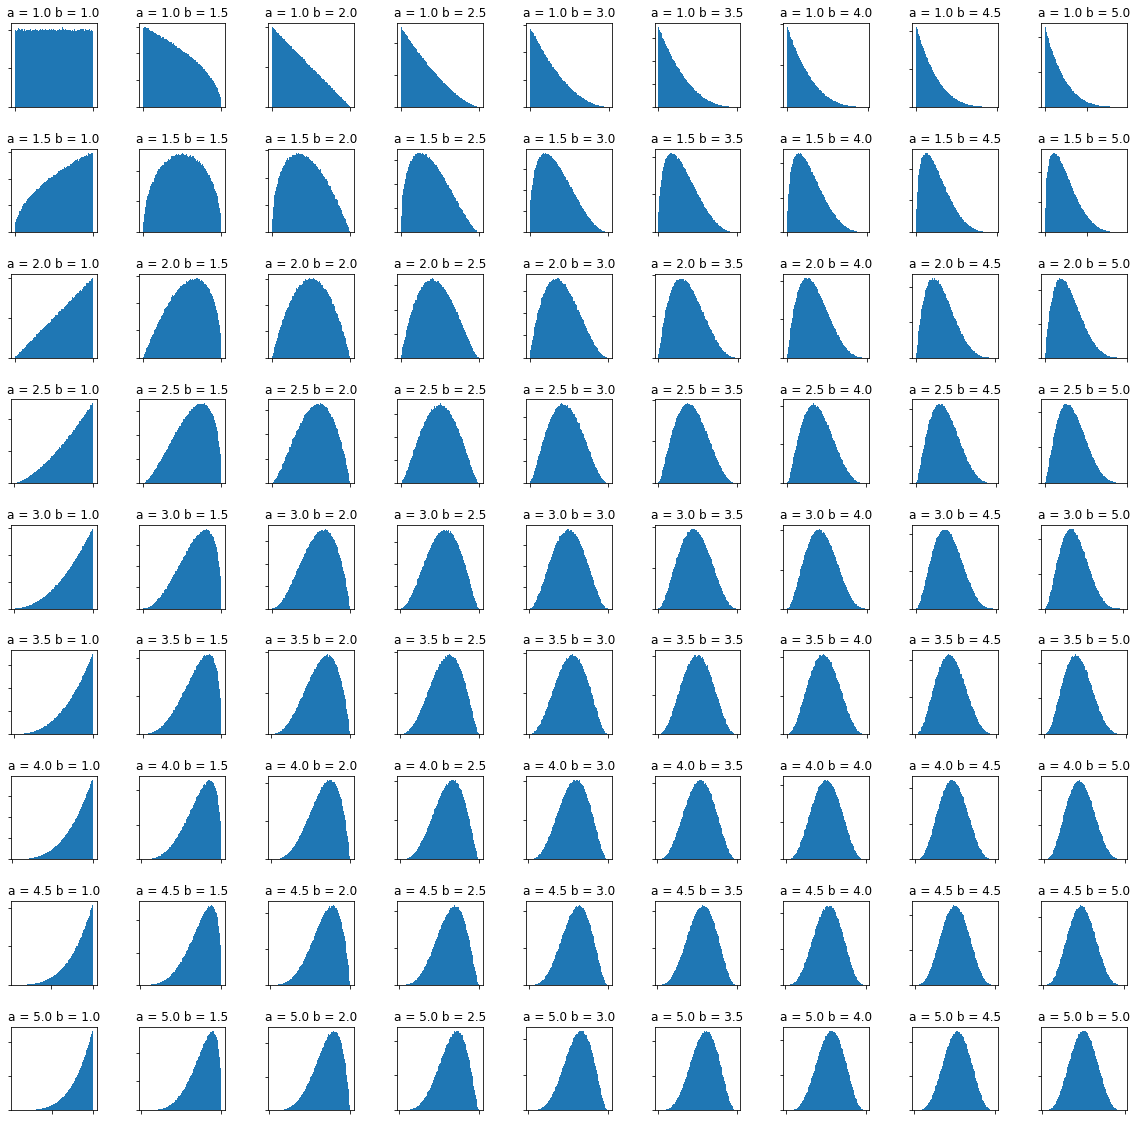

<AxesSubplot:xlabel='b', ylabel='a'>

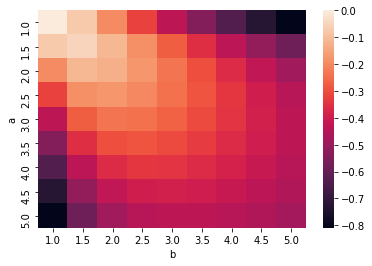

In [32]:
from scipy.stats import beta
a = np.linspace(1,5, num = 9)
b = np.linspace(1,5, num = 9)
N = 1000000
stackedArray = np.empty((0,3))

fig = plt.figure(figsize=(20,20))
grid = plt.GridSpec(9, 9, wspace = 0.5, hspace = 0.5)

for i in range(len(a)):
    for j in range(len(b)):
        r = beta.rvs(a[i], b[j], size=N)
        arrayA = np.array(a[i])
        arrayB = np.array(b[j])
        entr = beta.entropy(a[i],b[j])
        arrayAB = np.concatenate((arrayA, arrayB, entr), axis=None)
        stackedArray = np.vstack([stackedArray, arrayAB])
        ax = plt.subplot(grid[i,j])
        ax.hist(r,bins=100)
        title = 'a = ' + str(a[i]) + ' b = ' + str(b[j])
        ax.title.set_text(title)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        
        
plt.show()
df = pd.DataFrame(stackedArray, columns=['a', 'b', 'H'])
pivtable = pd.pivot_table(data=df, index='a', values='H', columns='b')
sns.heatmap(pivtable)

The tighter/more centralized the beta distribution, the less likely it is to occur because these shapes have the least entropy. 

# Conditional Entropy as a measure of independence. - HOMEWORK.

Two random variables can have varying degrees of coupling. On one end of the spectrum, they can be independent of each other. On the other, one can be a deterministic function of the other. Devise a simulation / sampling based experiment to demonstrate 

1) When X and Y are independent, H(Y|X) = H(Y) and H(X|Y) = H(X).

2) When Y is a deterinistic function of X, then H(Y|X) = 0.

These can be easily proved directly. But I want you to design a simulation experiment to test it. For simplicity, work with discrete random variables. 

While your at it, go ahead and demonstrate that

1) I(X;Y) = H(X) when Y is a deterministic function of X

2) I(X;Y) = 0 when Y and X are independent.

When done, write a few sentences about why these make sense given what entropy, conditional entropy, and mutual information represent.

In [30]:
from scipy.stats import rv_discrete
from scipy.stats import uniform
# case 1
print('Independent:')
# dice roll
xk = (1, 2, 3, 4, 5, 6)
pk = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)
diceroll = rv_discrete(values=(xk, pk))

# flipping a coin
xk = (0, 1)
pk = (1/2, 1/2)
coinflip = rv_discrete(values=(xk, pk))

N = 10000
count_1 = 0
count_H = 0
count_both = 0
# case 1
for i in range(N):
    x = diceroll.rvs(size=1)
    y = coinflip.rvs(size=1)
    if x == 1:
        count_1 +=1
    if y == 0:
        count_H += 1
    if x ==1 and y ==0:
        count_both +=1
        
p_1 = count_1/N
p_H = count_H/N
p_both = count_both/N
#print(count_1, count_H, count_both)

H_1 = -p_1*np.math.log2(p_1)
H_H = -p_H*np.math.log2(p_H)

# x = getting a 1 on dice roll; y = heads
H_YX = 6* (- p_both*np.math.log2(p_both/p_1)) # multiply by 6 because it doesn't matter which dice roll outcome it is, account for all outcomes
H_XY = 2* (- p_both*np.math.log2(p_both/p_H)) # multiply by 2 to account for both head and tail possibility since it does not depend on this

#print('H(X=getting 1 dice roll): ', H_1)


print('H(Y|X) = ', H_YX)
print('H(Y=getting heads coin flip): ', H_H)
print('H(X|Y) = ', H_XY)
print('H(X=getting 1 dice roll): ', H_1)

I_XY = H_1 -  H_XY 
print('I(X,Y) = ', I_XY)



# case 2


heads1 = 0
heads2 = 0
bothheads = 0

for i in range(N):
    x = coinflip.rvs(size=1)
    y = coinflip.rvs(size=1)
    
    if x == 0:
        heads1 += 1
        if y == 0:
            bothheads +=1

        
pheads1 = heads1/N
pbothheads = bothheads/N

H_H1 = -pheads1*np.math.log2(pheads1)
H_both = -pbothheads*np.math.log2(pbothheads)

# x = both coins are heads ; y = 1st coin is heads

H_YX = 2* (- pbothheads*np.math.log2(pbothheads/pbothheads)) # multiply by 2 to account for both head and tail possibility since it does not depend on this
H_XY = 2* (- pbothheads*np.math.log2(pbothheads/pheads1)) # multiply by 2 to account for both head and tail possibility since it does not depend on this
print('')
print('Deterministic/dependent:')
print('H(Y|X) = ', H_YX)

I_XY = H_both -  H_XY 
print('I(X,Y) = ', I_XY)


Independent:
H(Y|X) =  0.4942536684058717
H(Y=getting heads coin flip):  0.49946669013006756
H(X|Y) =  0.43269641267240583
H(X=getting 1 dice roll):  0.42971883937874916
I(X,Y) =  -0.0029775732936566657

Deterministic/dependent:
H(Y|X) =  -0.0
I(X,Y) =  -0.001835559631293171


# Cross entropy - HOMEWORK

Use sampling to calculate the cross entropy between p=Beta(3,3) and q=Beta(a,b) for a and b values linearly spaced in the [1,5] range. For each combination of (a,b), calculate the relevant cross entropy. Plot a heatmap of the cross entropy as a function of (a,b). Find the values of (a,b) that minimize this cross entropy. When viewing these results, keep in mind that cross entropy is in some sense a measure of how clumped probability of one distribution is relative to another.

<Figure size 1440x1440 with 0 Axes>

From the heat map, a = 5 and b = 1 minimizes the cross entropy


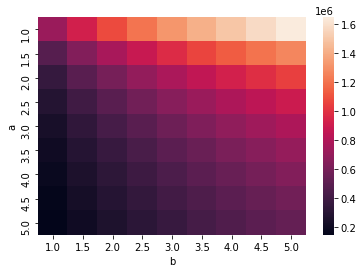

In [16]:
from scipy.stats import beta
a = np.linspace(1,5, num = 9)
b = np.linspace(1,5, num = 9)
N = 1000000
stackedArray = np.empty((0,3))
p = beta.rvs(3,3, size = N)

def cross_entropy(p, q):
    return -sum([p[i]*np.math.log2(q[i]) for i in range(len(p))])


fig = plt.figure(figsize=(20,20))

for i in range(len(a)):
    for j in range(len(b)):
        q = beta.rvs(a[i], b[j], size=N) 
        arrayA = np.array(a[i])
        arrayB = np.array(b[j])
        entr = cross_entropy(p,q)
        arrayAB = np.concatenate((arrayA,arrayB, entr), axis=None)        
        stackedArray = np.vstack([stackedArray, arrayAB])
        
        
plt.show()
df = pd.DataFrame(stackedArray, columns=['a', 'b', 'H'])
pivtable = pd.pivot_table(data=df, index='a', values='H', columns='b')
sns.heatmap(pivtable)

print('From the heat map, a = 5 and b = 1 minimizes the cross entropy')

# Intro to decision Trees - HOMEWORK

Consider the dataset shown in the following cell that outlines how likely a person is to eat a food on the basis of three characteristics. A decision tree works in the following way. It loops over every attribute (taste, temperature, texture) and then calculates the information gained (which is the mutual information) for each potential splitting. It then splits the data along the attribute that creates the largest information gain. 

Suppose X is the distribution of 'yes', 'no' responses without any splits. If you split on the basis of 'taste', you will end up with three classes. You can then calculate the conditional entropy H(X|taste) and use this to calculate the information gain

$$ I(X,taste) = H(X) - H(X|taste) $$ .

Recall that one formulation of the conditional entropy (the one useful here) is

$$ H(X|taste) = \displaystyle \sum_{t \in taste} p(t) H(X|taste=t)  $$

where the last quantity $H(X|taste = t)$ can be calculated within the propsed class. 

TASK: For this data, calculate and output the information gained by splitting along each of the three attributes. 

The one with the highest information gain would be the one chosen for the first split. For a full decision tree, you would subsequently split each class along the attribute with the largest information gain recursively until no further splitting is possible (that is, you end up with pure classes with no mixing). This can be a bit of a challenge from the perspective of managing data structures, thus you'll just be working with a library for constructing full decision trees in this HW. This is just a taste of how they work.

In [29]:
dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],
       'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],
       'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],
       'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}

df = pd.DataFrame(dataset,columns=['Taste','Temperature','Texture','Eat'])

df.head(10)
print(df)

# define all probabilities
p_yes = 6/10
p_no = 4/10

p_spicy = 5/10
p_salty = 3/10
p_sweet = 2/10

p_yes_spicy = 3/5
p_no_spicy = 2/5
p_yes_salty = 1/3
p_no_salty = 2/3
p_yes_sweet = 2/2
p_no_sweet = 0

p_hot = 6/10
p_cold = 4/10

p_yes_hot = 4/6
p_no_hot = 2/6
p_yes_cold = 2/4
p_no_cold = 2/4

p_soft = 6/10
p_hard = 4/10

p_yes_soft = 3/6
p_no_soft = 3/6
p_yes_hard = 3/4
p_no_hard = 1/4

# calculate entropy of eat (yes/no)
hx = - p_yes*np.math.log2(p_yes) - p_no*np.math.log2(p_no)
print('Information gained: ')

# Taste entropy, information gain

hx_spicy = p_spicy * ( - p_yes_spicy * np.math.log2(p_yes_spicy) - p_no_spicy * np.math.log2(p_no_spicy))
hx_salty = p_salty * ( - p_yes_salty * np.math.log2(p_yes_salty) - p_no_salty * np.math.log2(p_no_salty))
hx_sweet = p_sweet * ( - p_yes_sweet * np.math.log2(p_yes_sweet) )

hx_taste = hx_spicy + hx_salty + hx_sweet
ix_taste = hx-hx_taste
#print('H(X) = ', hx)
#print('H(X|taste) = ', hx_taste)
print('I(X,taste) = ', ix_taste)

# Temperature entropy, information gain

hx_hot = p_hot * ( - p_yes_hot * np.math.log2(p_yes_hot) - p_no_hot * np.math.log2(p_no_hot))
hx_cold = p_cold * ( - p_yes_cold * np.math.log2(p_yes_cold) - p_no_cold * np.math.log2(p_no_cold))


hx_temp = hx_hot + hx_cold
ix_temp = hx-hx_temp
#print('H(X|temp) = ', hx_temp)
print('I(X,temperature) = ', ix_temp)

# Texture entropy, information gain

hx_soft = p_soft * ( - p_yes_soft * np.math.log2(p_yes_soft) - p_no_soft * np.math.log2(p_no_soft))
hx_hard = p_hard * ( - p_yes_hard * np.math.log2(p_yes_hard) - p_no_hard * np.math.log2(p_no_hard))


hx_text = hx_soft + hx_hard
ix_text = hx-hx_text
#print('H(X|temp) = ', hx_text)
print('I(X,texture) = ', ix_text)

print('The attribute with the highest information gain is taste, so this would be chosen for the first split')


   Taste Temperature Texture  Eat
0  Salty         Hot    Soft   No
1  Spicy         Hot    Soft   No
2  Spicy         Hot    Hard  Yes
3  Spicy        Cold    Hard   No
4  Spicy         Hot    Hard  Yes
5  Sweet        Cold    Soft  Yes
6  Salty        Cold    Soft   No
7  Sweet         Hot    Soft  Yes
8  Spicy        Cold    Soft  Yes
9  Salty         Hot    Hard  Yes
Information gained: 
I(X,taste) =  0.2099865470109874
I(X,temperature) =  0.01997309402197489
I(X,texture) =  0.0464393446710154
The attribute with the highest information gain is taste, so this would be chosen for the first split


# Metacognition questions.

Briefly answer these two questions. A few sentences or more is sufficient on each.

1) What did you learn as part of this assignment (hopefully something)?

2) What questions do you still have or is there something you still don't grasp? 

If you understand everything, already knew all of this, did not learn anything new, and don't have any questions, great! Instead of answering the above questions, instead write me a new question (with full solutions) that you think would help illustrate one or more of the points above.

********
1) I learned how decision trees split based on the informaiton gained. I also learned how entropy is calculated in a probablisitic way.
2) Conditional and cross entropy and KL divergence are still new concepts to me that I don't fully understand. 